In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import nltk
from nltk.corpus import wordnet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
customer = pd.read_csv('BankReviews.csv',encoding='windows-1252')

In [5]:
customer.head()

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,10-02-2017,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,21-08-2017,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,27-05-2016,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      505 non-null    object
 1   Stars     505 non-null    int64 
 2   Reviews   505 non-null    object
 3   BankName  505 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [7]:
customer.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [8]:
customer['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

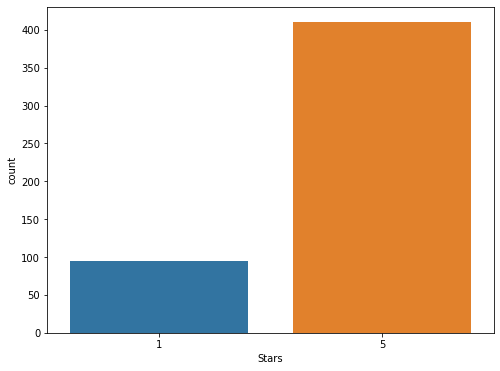

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(customer.Stars)
plt.show()

In [0]:
X = customer['Reviews']
Y = customer['Stars']

In [11]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [0]:
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
final_dictionary = []
for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but 

In [15]:
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)
print(positive_reviews[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled\xa0together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less', 'Sentimen

In [16]:
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:5])

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': "\r\nLending tree matching me up with companies that don't offer the product I requested.\r\n        ", 'Sentiment': 'Neutral'}, {'Review': '\r\nThey called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.\r\n        ', 'Sentiment': 'Neutral'}]


In [17]:
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)
print(negative_reviews[:5])

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

In [0]:
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [20]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


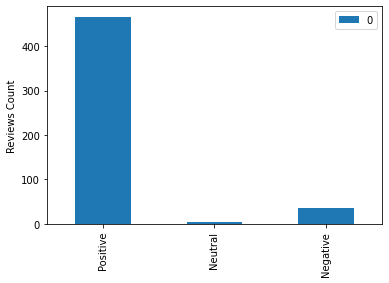

In [21]:
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')   
plt.show()

In [0]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [0]:
X = X.apply(lambda y: clean_text(y))

In [24]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

In [0]:
tokens_vect = CountVectorizer(stop_words='english')

In [0]:
token_dtm = tokens_vect.fit_transform(X)

In [27]:
tokens_vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2011',
 '2017',
 '2018',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'a

In [28]:
pd.DataFrame(token_dtm.toarray(),columns = tokens_vect.get_feature_names())

,10,100,101,1014,1031,1040s,11,12,13,15,18,19th,1st,20,200,2000,2005,2011,2017,2018,20k,212,22,23,2300,23rd,25,2500,27,29,2929,2d,2nd,30,30days,30k,32,34,35,375,...,withnot,woes,woman,won,wonder,wonderful,wonderfully,wont,word,words,work,worked,working,works,workwe,world,worry,worrying,worse,worst,worth,wouldn,wouldnt,wow,write,writing,written,wrong,wyndham,wyndum,xx,year,years,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

In [30]:
count_dtm_dataframe.head()

,Word,Count
0,10,10
1,100,9
2,101,1
3,1014,1
4,1031,2


In [0]:
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

In [32]:
count_dtm_dataframe.head()

,Word,Count,Sentiment
0,10,10,Neutral
1,100,9,Neutral
2,101,1,Neutral
3,1014,1,Neutral
4,1031,2,Neutral


In [0]:
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [34]:
positive_words_df.head(20)

,Word,Count,Sentiment
1022,great,139,Positive
278,best,99,Positive
1739,professional,70,Positive
746,easy,65,Positive
1095,highly,64,Positive
2257,thanks,61,Positive
2207,sure,51,Positive
64,able,47,Positive
1008,good,39,Positive
1056,happy,37,Positive


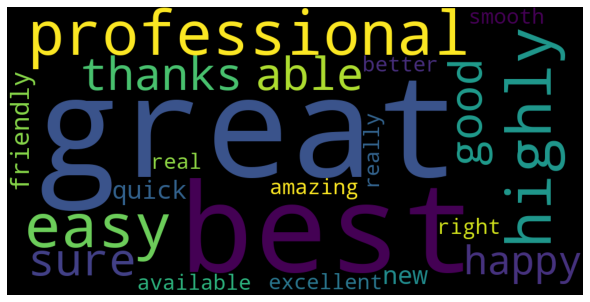

In [35]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:21,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [0]:
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [37]:
negative_words_df.head(20)

,Word,Count,Sentiment
436,closed,68,Negative
858,extremely,46,Negative
1059,hard,40,Negative
1686,poor,32,Negative
489,complicated,18,Negative
1352,little,15,Negative
1715,previous,13,Negative
1619,past,13,Negative
829,expected,11,Negative
2127,spent,11,Negative


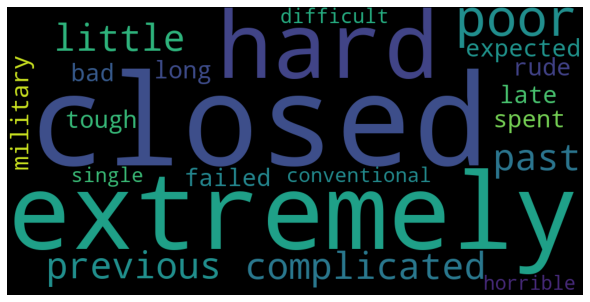

In [38]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:21,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [0]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state = 123, test_size = 0.2)  


In [72]:
print('No.of observations in train_X: ',len(train_X), '| No.of observations in test_X: ',len(test_X))
print('No.of observations in train_Y: ',len(train_Y), '| No.of observations in test_Y: ',len(test_Y))

No.of observations in train_X:  404 | No.of observations in test_X:  101
No.of observations in train_Y:  404 | No.of observations in test_Y:  101


In [0]:
vect = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [0]:
train_X_fit = vect.fit(train_X)
train_X_dtm = vect.transform(train_X)
test_X_dtm = vect.transform(test_X)

In [43]:
print(train_X_dtm)

  (0, 31)	1
  (0, 406)	1
  (0, 569)	1
  (0, 892)	1
  (0, 922)	1
  (0, 937)	2
  (0, 946)	1
  (0, 1701)	1
  (0, 2004)	2
  (0, 2041)	1
  (0, 2101)	1
  (0, 2271)	1
  (0, 2298)	1
  (1, 406)	2
  (1, 530)	1
  (1, 630)	2
  (1, 1087)	1
  (1, 1097)	1
  (1, 1320)	1
  (1, 1375)	1
  (1, 1400)	1
  (1, 1657)	1
  (1, 1666)	1
  (1, 2120)	1
  (1, 2130)	1
  :	:
  (402, 1728)	1
  (402, 2130)	1
  (402, 2188)	1
  (402, 2298)	1
  (403, 254)	1
  (403, 337)	1
  (403, 721)	1
  (403, 772)	1
  (403, 824)	1
  (403, 827)	1
  (403, 952)	2
  (403, 1033)	1
  (403, 1233)	1
  (403, 1263)	1
  (403, 1439)	1
  (403, 1628)	1
  (403, 1666)	2
  (403, 1669)	1
  (403, 1686)	1
  (403, 1860)	1
  (403, 1889)	1
  (403, 1906)	1
  (403, 1978)	1
  (403, 2092)	1
  (403, 2293)	1


In [44]:
print(test_X_dtm)

  (0, 389)	1
  (0, 694)	1
  (0, 738)	1
  (0, 857)	1
  (0, 1263)	2
  (0, 1597)	2
  (0, 1651)	1
  (0, 1844)	1
  (0, 2299)	1
  (1, 65)	1
  (1, 210)	1
  (1, 236)	1
  (1, 261)	1
  (1, 316)	1
  (1, 411)	1
  (1, 596)	1
  (1, 621)	1
  (1, 655)	1
  (1, 688)	1
  (1, 752)	3
  (1, 811)	1
  (1, 846)	1
  (1, 853)	1
  (1, 999)	1
  (1, 1181)	1
  :	:
  (99, 2309)	1
  (100, 59)	1
  (100, 139)	1
  (100, 222)	1
  (100, 322)	1
  (100, 795)	1
  (100, 796)	1
  (100, 894)	1
  (100, 946)	1
  (100, 1000)	1
  (100, 1003)	1
  (100, 1027)	1
  (100, 1181)	1
  (100, 1349)	1
  (100, 1483)	1
  (100, 1564)	1
  (100, 1597)	1
  (100, 1650)	1
  (100, 1677)	1
  (100, 2063)	1
  (100, 2092)	1
  (100, 2101)	1
  (100, 2116)	1
  (100, 2236)	1
  (100, 2278)	1


In [45]:
vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2011',
 '2017',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'adverti

In [75]:
print('No.of features for are',len(vect.get_feature_names()))


No.of features for are 2326


In [0]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns=vect.get_feature_names())


In [77]:
train_X_dtm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,18,19th,1st,20,200,2005,2011,2017,20k,212,22,23,2300,23rd,25,2500,27,29,2929,2d,2nd,30,30days,30k,32,34,35,375,3days,3rd,...,wish,wished,withnot,woes,woman,won,wonder,wonderful,wonderfully,wont,word,words,work,worked,working,works,world,worry,worrying,worse,worst,worth,wouldn,wouldnt,wow,write,writing,written,wrong,wyndham,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
vect_tdm = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [0]:
train_X_tdm = vect_tdm.fit_transform(train_X)
test_X_tdm = vect.transform(test_X)

In [51]:
print(train_X_tdm)

  (0, 2298)	0.14286983052671703
  (0, 946)	0.14224755314415755
  (0, 2271)	0.17571044807822656
  (0, 922)	0.3233491825918004
  (0, 892)	0.26011295239170645
  (0, 1701)	0.2512400242662845
  (0, 2041)	0.3233491825918004
  (0, 2101)	0.22021533325477322
  (0, 406)	0.1561851580910362
  (0, 569)	0.19081216066170623
  (0, 31)	0.26512133571501156
  (0, 937)	0.38453891230399817
  (0, 2004)	0.5110113727041861
  (1, 1320)	0.32157178350945675
  (1, 1097)	0.24221516698235504
  (1, 1400)	0.2144229039259181
  (1, 1375)	0.25868315281967424
  (1, 2130)	0.19906648114206718
  (1, 2120)	0.22944160479471662
  (1, 530)	0.25868315281967424
  (1, 630)	0.4479713951840844
  (1, 1657)	0.338039769346776
  (1, 1666)	0.1545477952469896
  (1, 1087)	0.3612500917730076
  (1, 406)	0.3106532661840388
  :	:
  (402, 1698)	0.1238490539966841
  (402, 1000)	0.19903961080263602
  (402, 2130)	0.19212465963127884
  (402, 2298)	0.13712974487668564
  (403, 1686)	0.2898920480946295
  (403, 337)	0.2898920480946295
  (403, 1906)	0.2

In [52]:
print(test_X_tdm)

  (0, 389)	1
  (0, 694)	1
  (0, 738)	1
  (0, 857)	1
  (0, 1263)	2
  (0, 1597)	2
  (0, 1651)	1
  (0, 1844)	1
  (0, 2299)	1
  (1, 65)	1
  (1, 210)	1
  (1, 236)	1
  (1, 261)	1
  (1, 316)	1
  (1, 411)	1
  (1, 596)	1
  (1, 621)	1
  (1, 655)	1
  (1, 688)	1
  (1, 752)	3
  (1, 811)	1
  (1, 846)	1
  (1, 853)	1
  (1, 999)	1
  (1, 1181)	1
  :	:
  (99, 2309)	1
  (100, 59)	1
  (100, 139)	1
  (100, 222)	1
  (100, 322)	1
  (100, 795)	1
  (100, 796)	1
  (100, 894)	1
  (100, 946)	1
  (100, 1000)	1
  (100, 1003)	1
  (100, 1027)	1
  (100, 1181)	1
  (100, 1349)	1
  (100, 1483)	1
  (100, 1564)	1
  (100, 1597)	1
  (100, 1650)	1
  (100, 1677)	1
  (100, 2063)	1
  (100, 2092)	1
  (100, 2101)	1
  (100, 2116)	1
  (100, 2236)	1
  (100, 2278)	1


In [53]:
vect_tdm.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2011',
 '2017',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'adverti

In [80]:
print('No.of features for are',len(vect_tdm.get_feature_names()))

No.of features for are 2326


In [0]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns=vect_tdm.get_feature_names())

In [82]:
train_X_dtm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,18,19th,1st,20,200,2005,2011,2017,20k,212,22,23,2300,23rd,25,2500,27,29,2929,2d,2nd,30,30days,30k,32,34,35,375,3days,3rd,...,wish,wished,withnot,woes,woman,won,wonder,wonderful,wonderfully,wont,word,words,work,worked,working,works,world,worry,worrying,worse,worst,worth,wouldn,wouldnt,wow,write,writing,written,wrong,wyndham,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_X_dtm_df = pd.DataFrame(test_X_dtm.toarray(),columns=vect_tdm.get_feature_names())

In [84]:
test_X_dtm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,18,19th,1st,20,200,2005,2011,2017,20k,212,22,23,2300,23rd,25,2500,27,29,2929,2d,2nd,30,30days,30k,32,34,35,375,3days,3rd,...,wish,wished,withnot,woes,woman,won,wonder,wonderful,wonderfully,wont,word,words,work,worked,working,works,world,worry,worrying,worse,worst,worth,wouldn,wouldnt,wow,write,writing,written,wrong,wyndham,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
model = MultinomialNB()
model.fit(train_X_dtm_df,train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
predict = model.predict(test_X_dtm_df)
len(predict)


101

In [61]:
print('Accuracy')
print(metrics.accuracy_score(test_Y,predict))

Accuracy
0.9801980198019802
